In [23]:
install.packages("corrplot")
library(tidyverse)
library(ggplot2)
library(corrplot)


The downloaded binary packages are in
	/var/folders/_1/mqwv2bd1667cwmfvh2v0m2sm0000gn/T//RtmpDlthYB/downloaded_packages


corrplot 0.92 loaded



In [24]:
housing_data <- read.csv("data/housing.csv",header = TRUE)
head(housing_data)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
2,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
3,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
4,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
5,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY
6,-122.25,37.85,52,919,213,413,193,4.0368,269700,NEAR BAY


In [25]:
# Count NA values
na_count <- sum(is.na(housing_data))

# Count duplicates
dup_count <- sum(duplicated(housing_data))

# Print the counts
cat("Number of NA values:", na_count, "\n")
cat("Number of duplicates:", dup_count, "\n")


Number of NA values: 207 
Number of duplicates: 0 


In [52]:
housing_data <- na.omit(housing_data)

head(housing_data)
nrow(housing_data)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
2,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
3,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
4,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
5,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY
6,-122.25,37.85,52,919,213,413,193,4.0368,269700,NEAR BAY


[1] 20640

In [63]:
summary(housing_data)

   longitude         latitude     housing_median_age  total_rooms   
 Min.   :-124.3   Min.   :32.54   Min.   : 1.00      Min.   :    2  
 1st Qu.:-121.8   1st Qu.:33.93   1st Qu.:18.00      1st Qu.: 1448  
 Median :-118.5   Median :34.26   Median :29.00      Median : 2127  
 Mean   :-119.6   Mean   :35.63   Mean   :28.64      Mean   : 2636  
 3rd Qu.:-118.0   3rd Qu.:37.71   3rd Qu.:37.00      3rd Qu.: 3148  
 Max.   :-114.3   Max.   :41.95   Max.   :52.00      Max.   :39320  
 total_bedrooms     population      households     median_income    
 Min.   :   1.0   Min.   :    3   Min.   :   1.0   Min.   : 0.4999  
 1st Qu.: 297.0   1st Qu.:  787   1st Qu.: 280.0   1st Qu.: 2.5634  
 Median : 438.0   Median : 1166   Median : 409.0   Median : 3.5348  
 Mean   : 537.9   Mean   : 1425   Mean   : 499.5   Mean   : 3.8707  
 3rd Qu.: 643.2   3rd Qu.: 1725   3rd Qu.: 605.0   3rd Qu.: 4.7432  
 Max.   :6445.0   Max.   :35682   Max.   :6082.0   Max.   :15.0001  
 median_house_value ocean_proximit

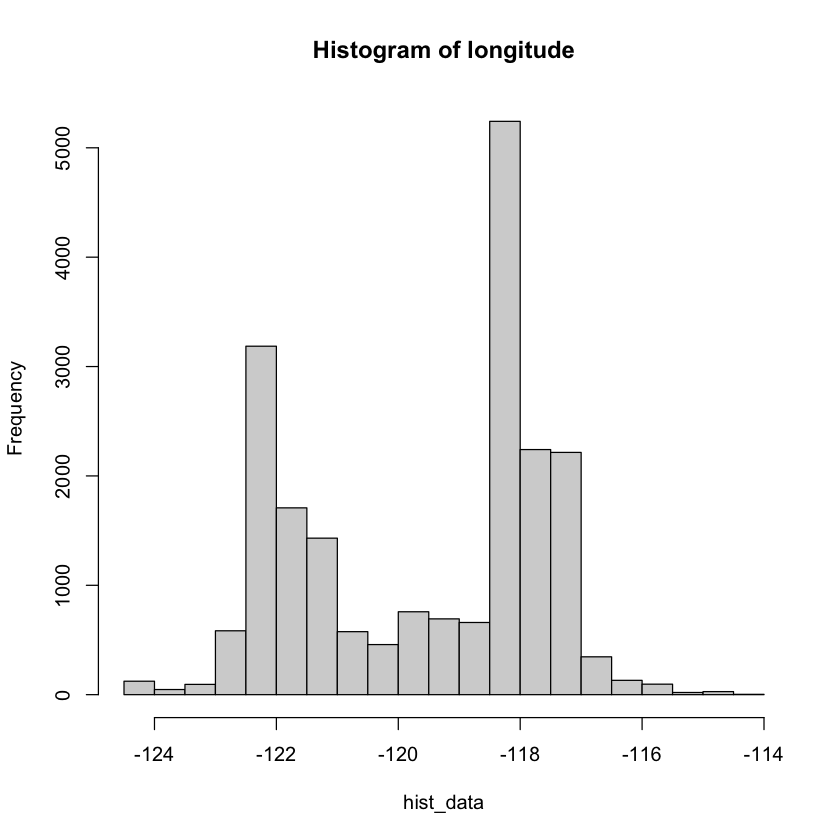

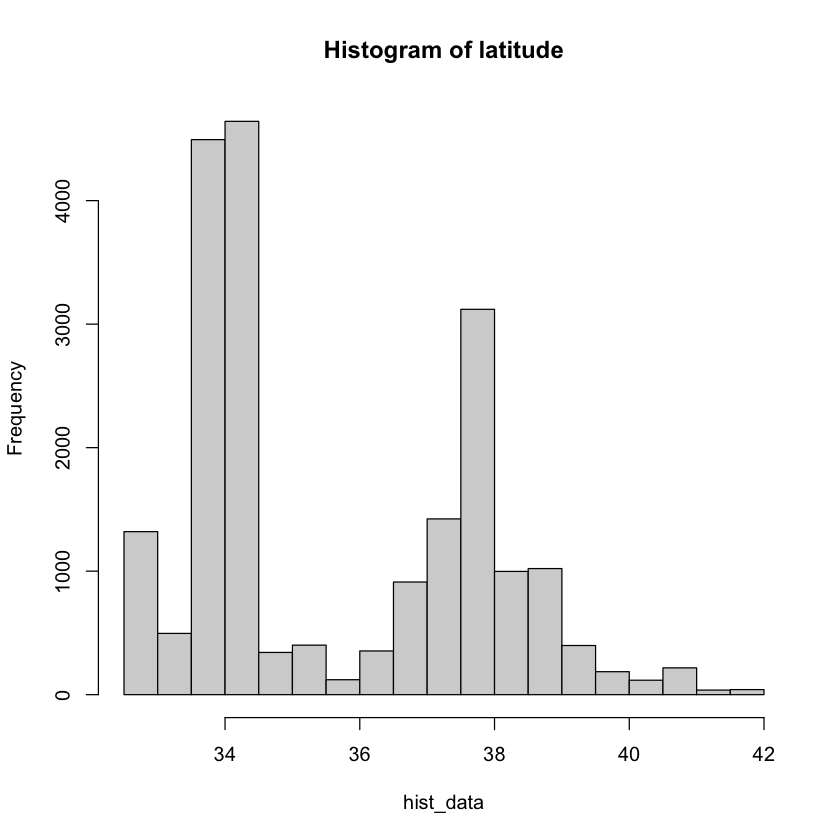

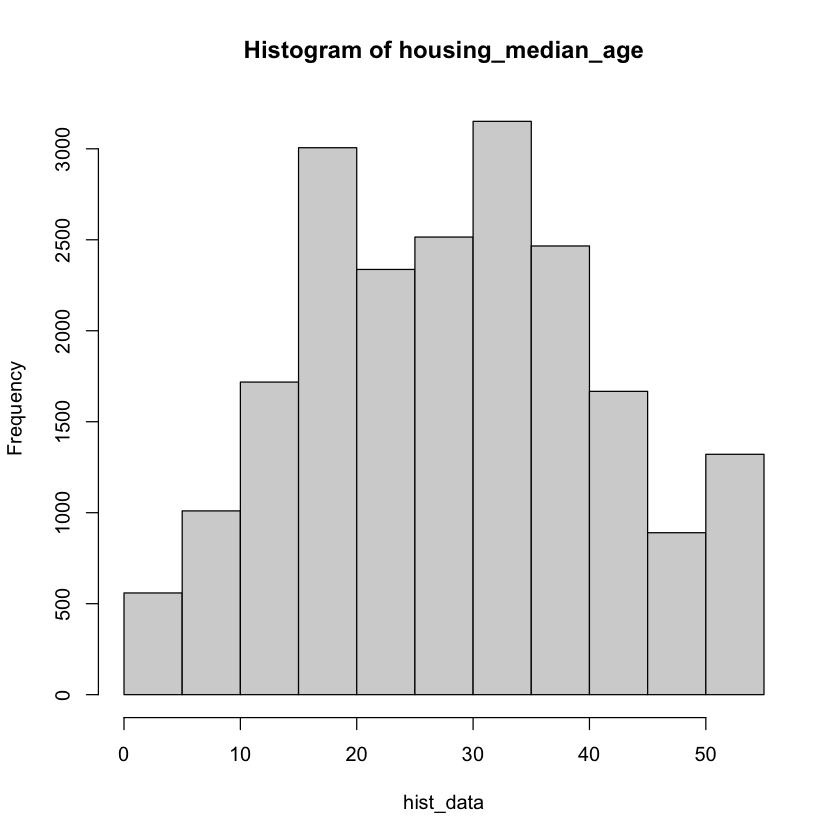

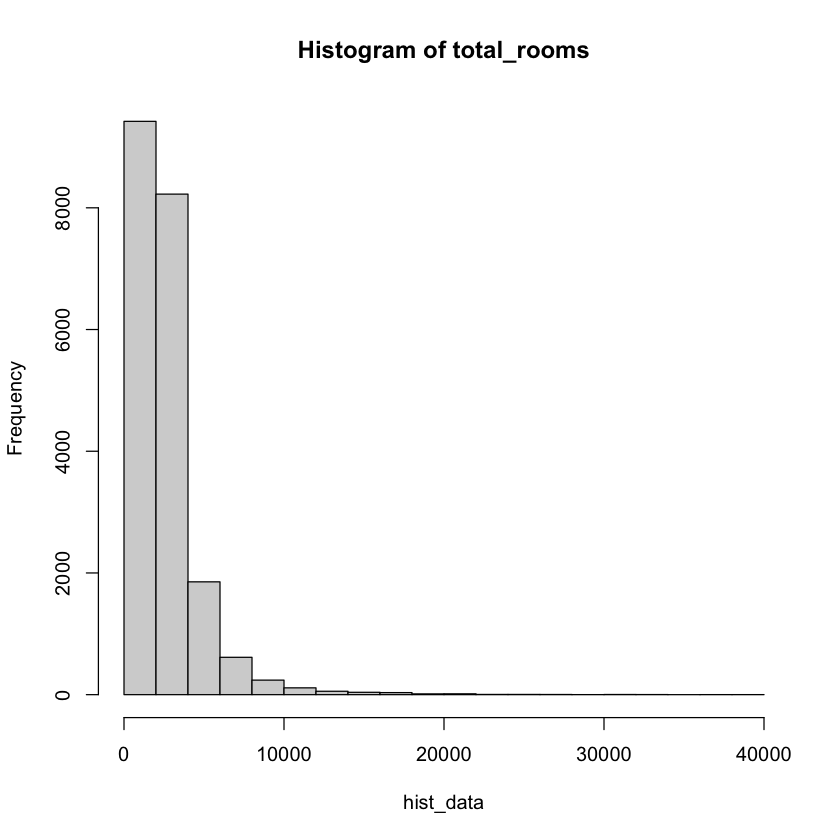

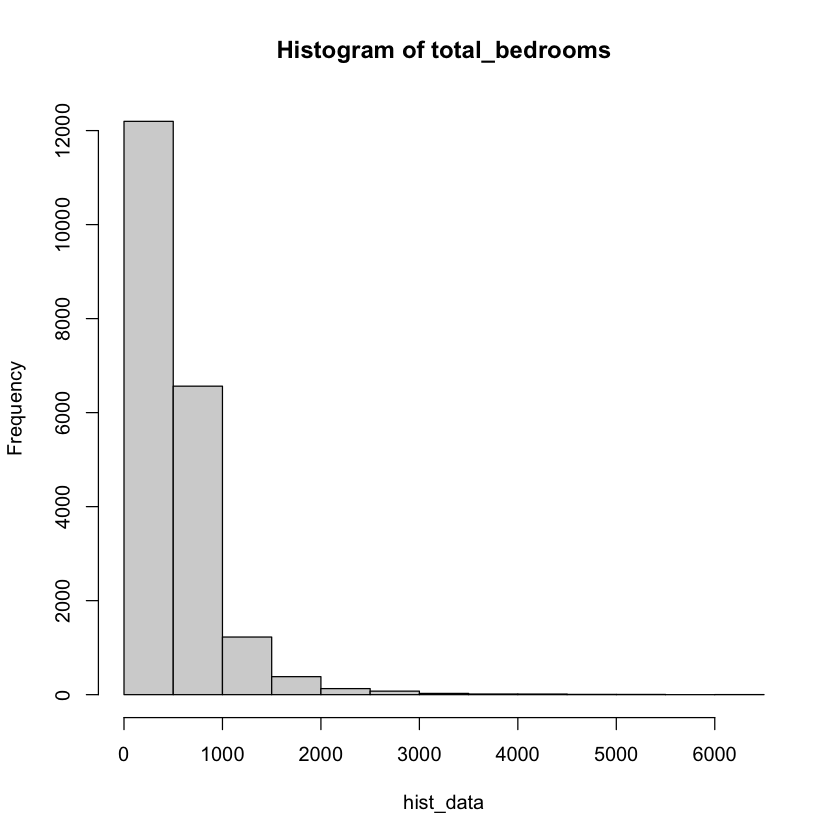

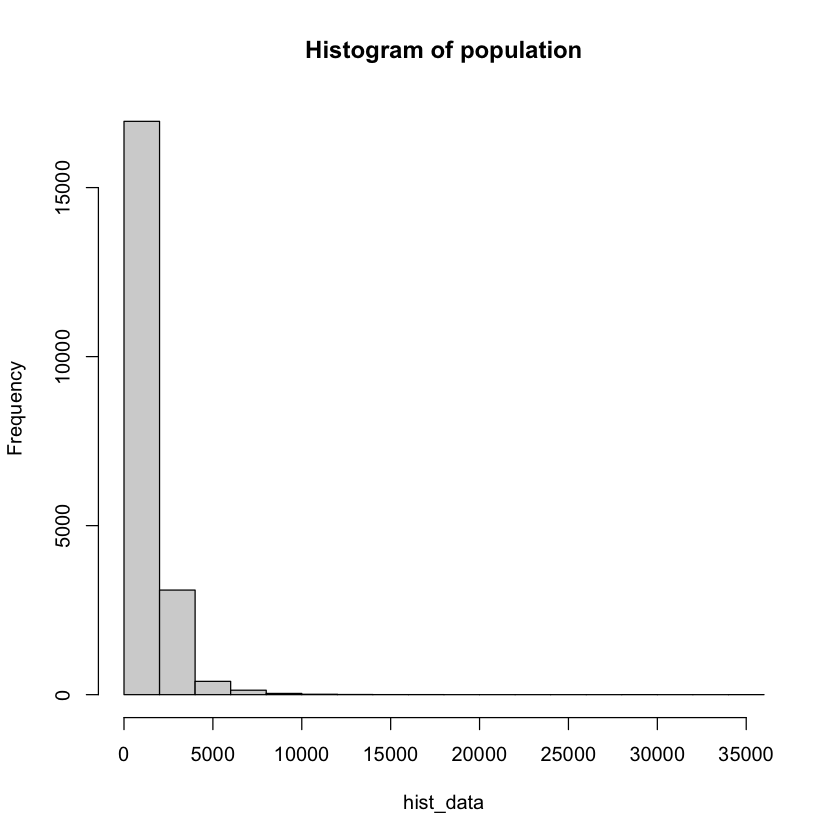

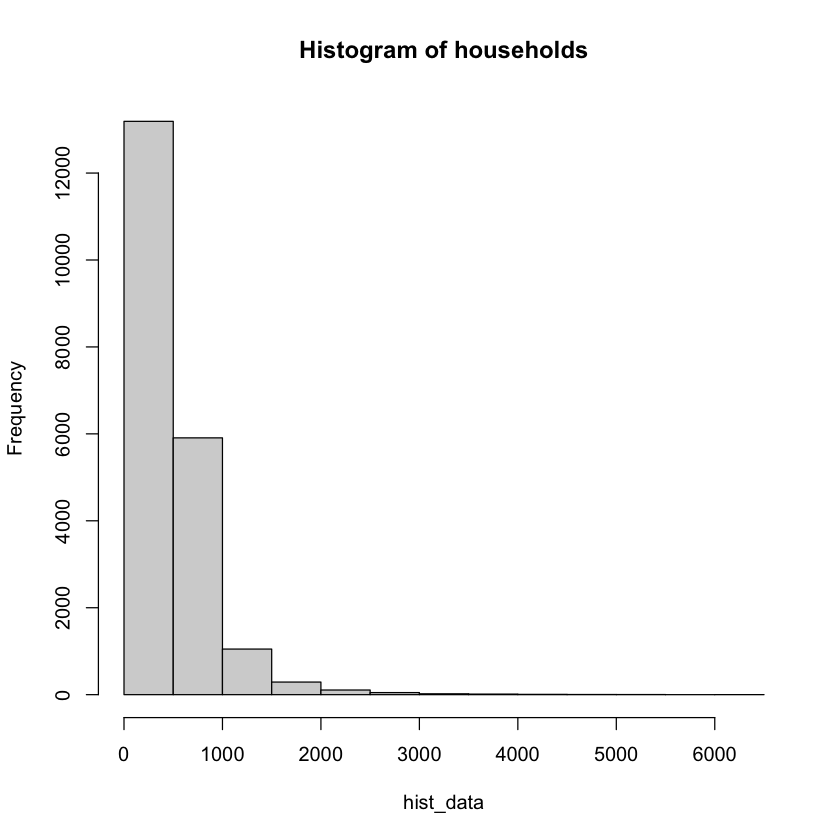

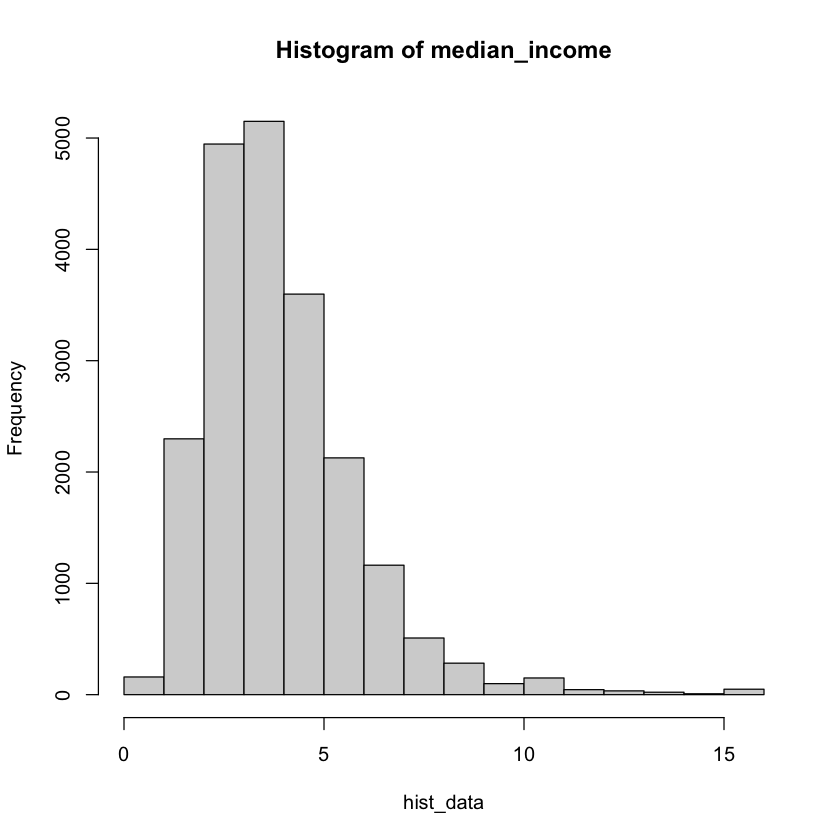

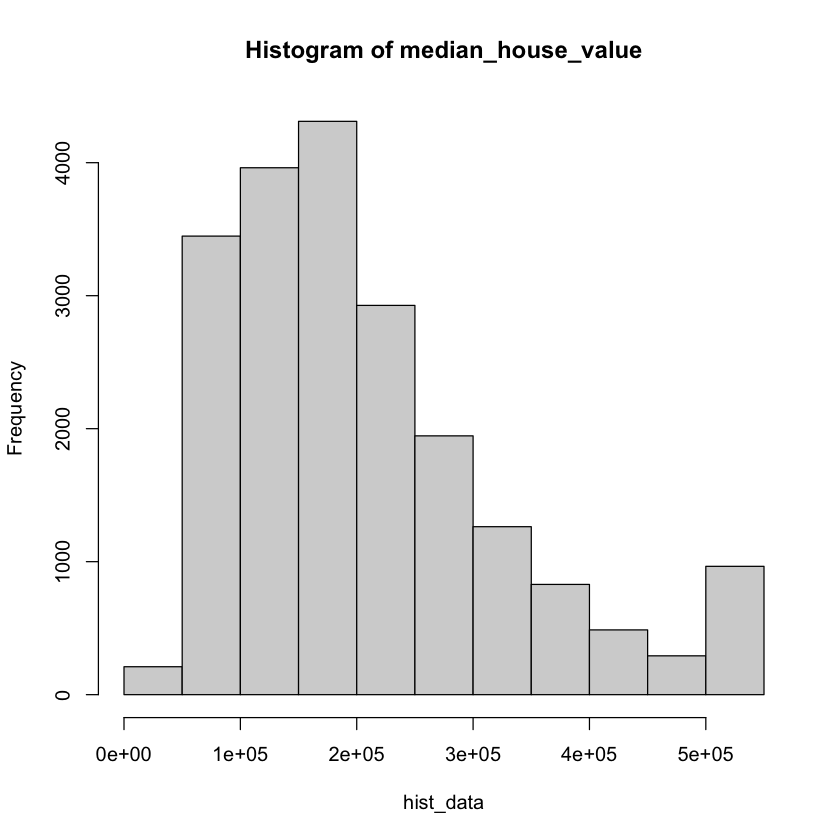

In [60]:
variables <- c("longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income",
               "median_house_value")

for (variable in variables) {
  hist_data <- housing_data[[variable]]  
  hist(hist_data, main = paste("Histogram of", variable))  
}

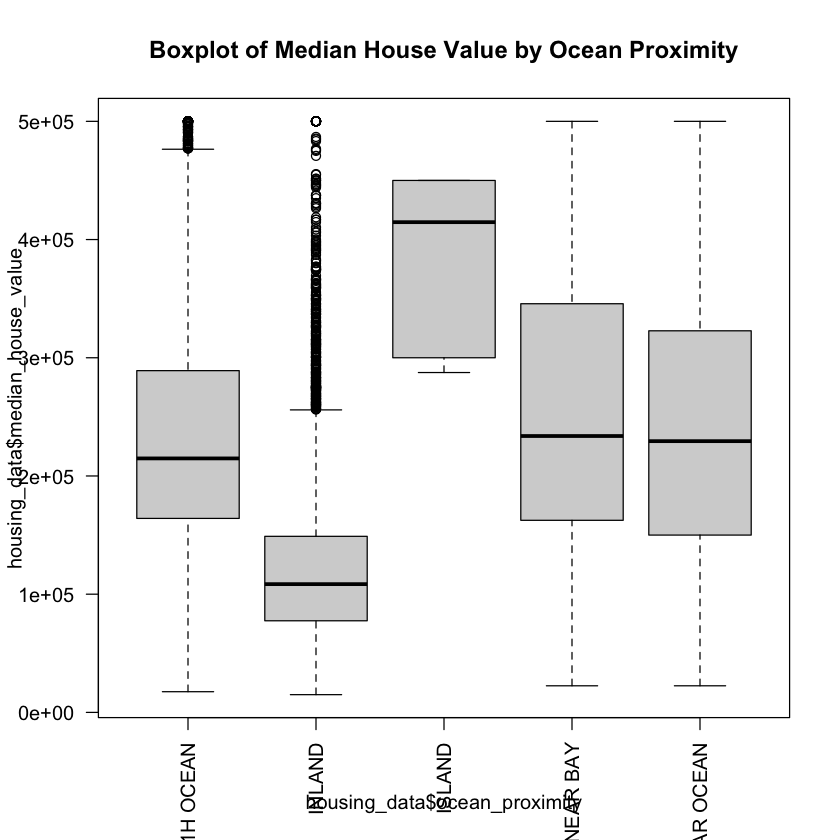

In [61]:
# Boxplot for categorical variable
boxplot(housing_data$median_house_value ~ housing_data$ocean_proximity, 
        main = "Boxplot of Median House Value by Ocean Proximity", las =2)

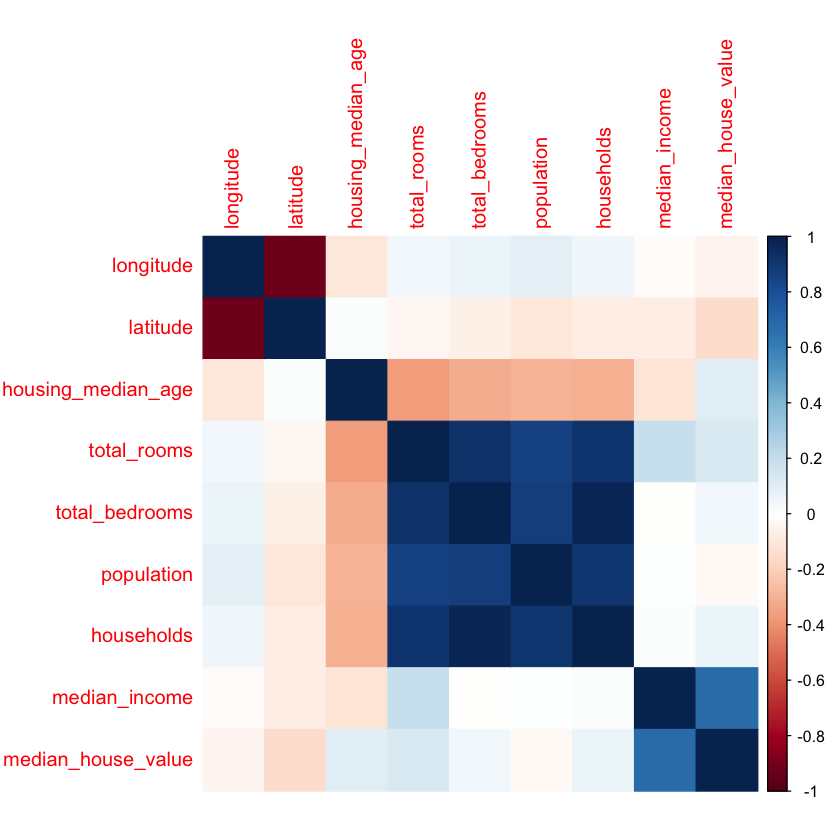

In [56]:
# Multivariate Analysis
# Correlation matrix

correlation_matrix <- cor(select(housing_data, -ocean_proximity))
corrplot(correlation_matrix, method = "color")

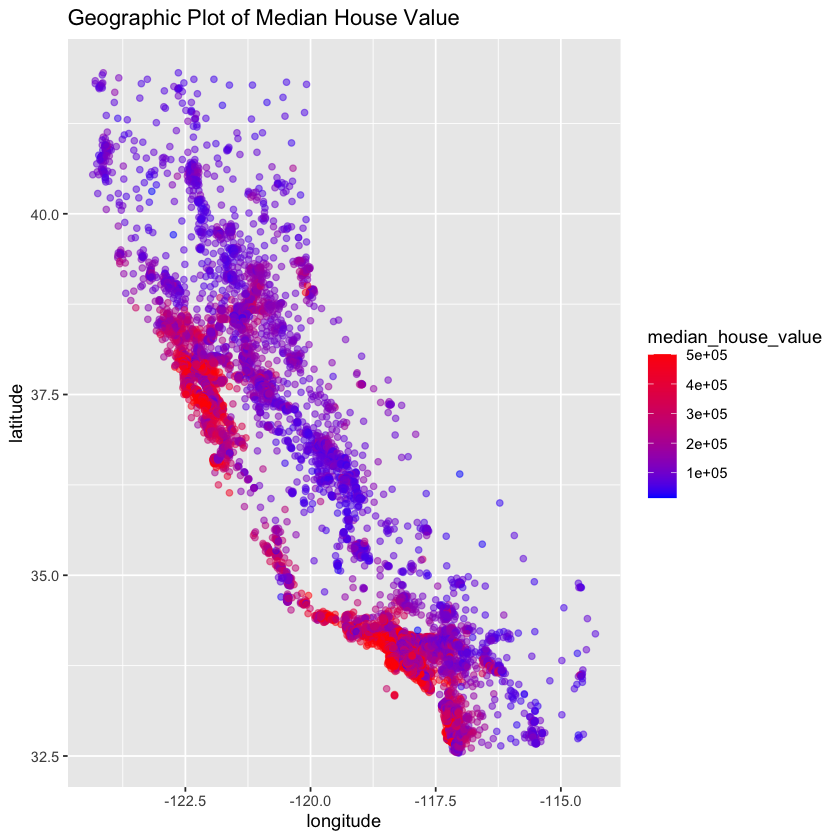

In [57]:
# Visualization
# Geographic plot
library(ggplot2)
ggplot(housing_data, aes(x = longitude, y = latitude, color = median_house_value)) +
  geom_point(alpha = 0.5) +
  scale_color_gradient(low = "blue", high = "red") +
  labs(title = "Geographic Plot of Median House Value")

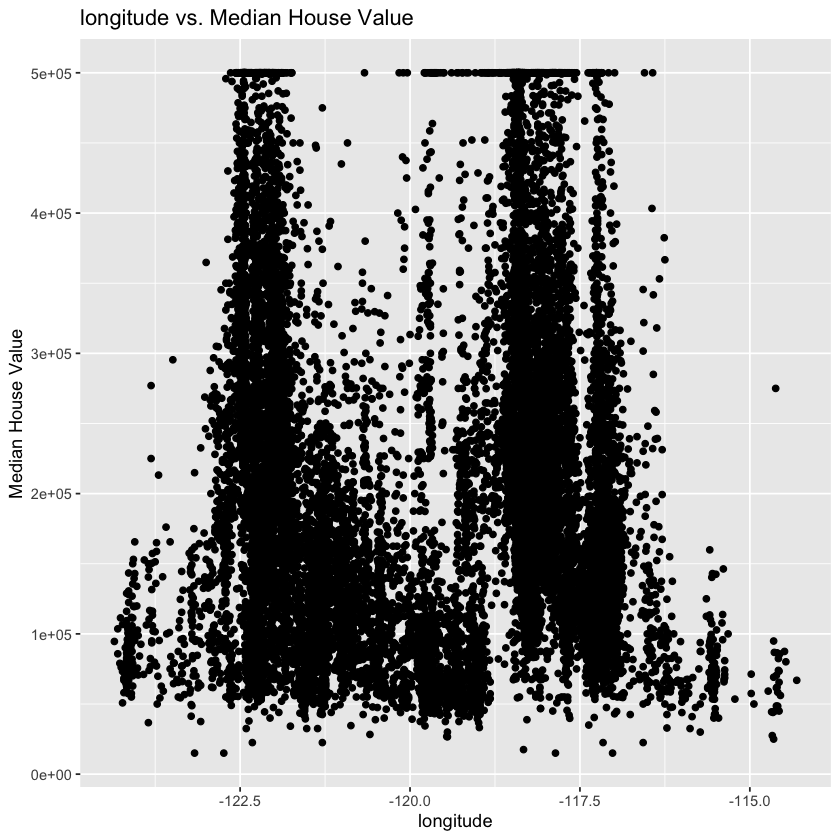

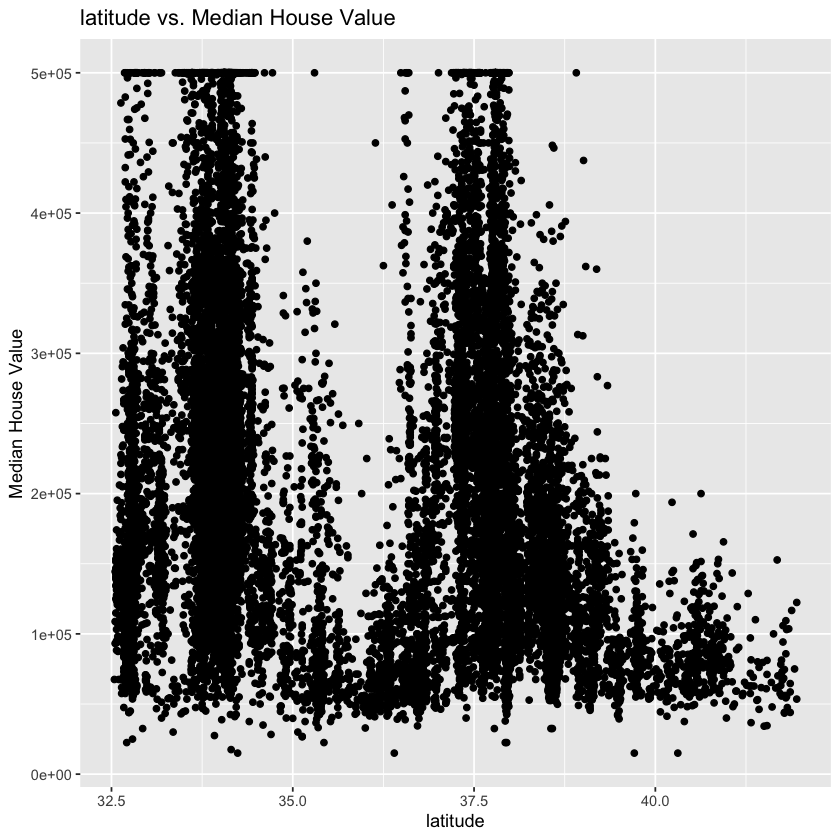

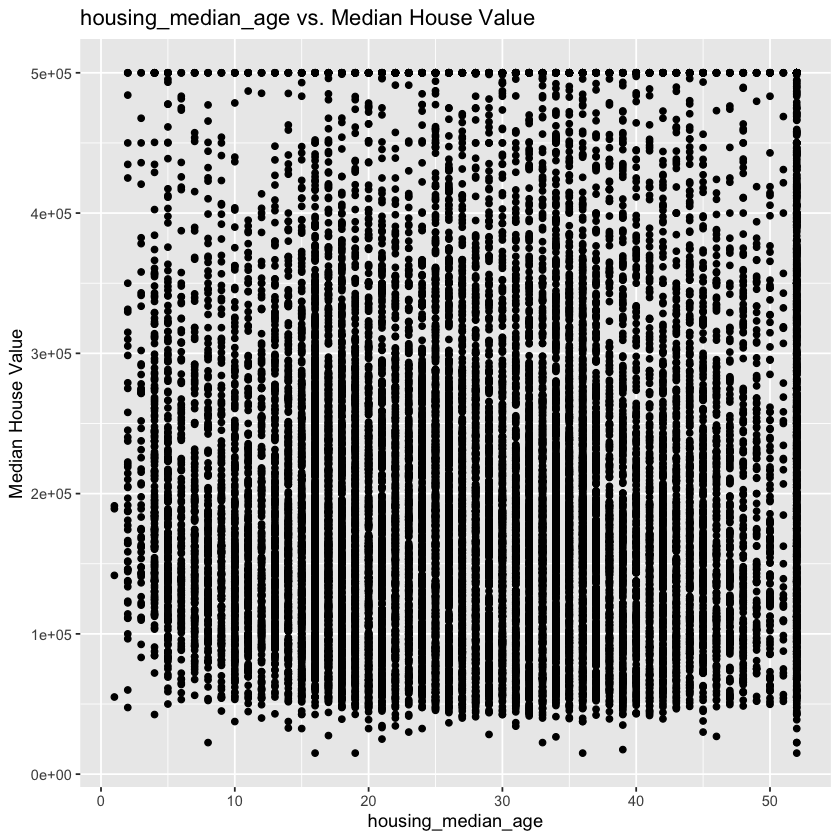

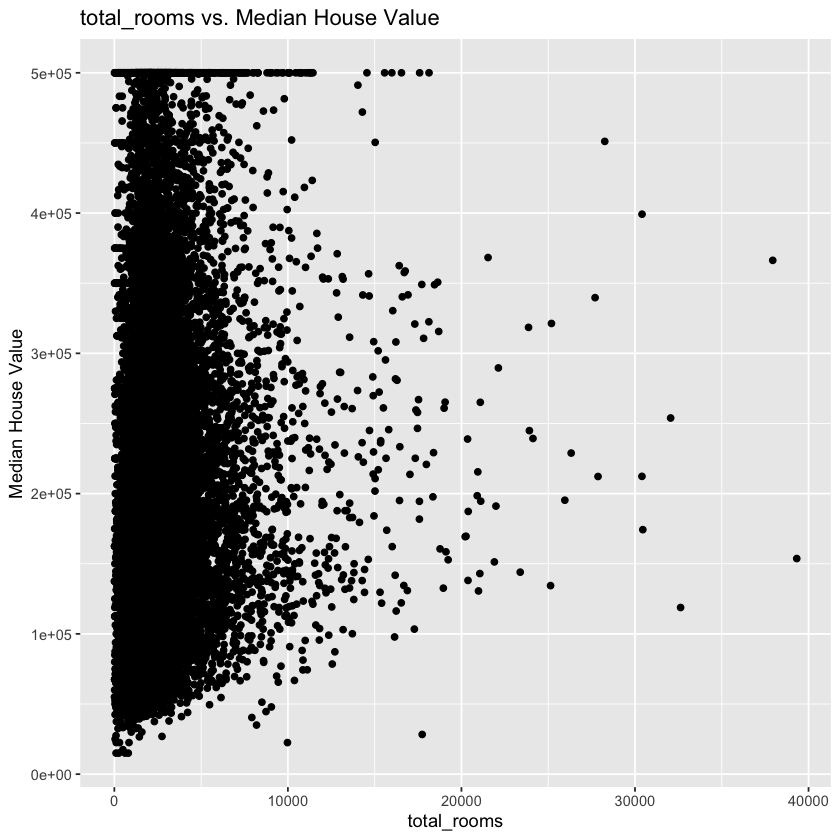

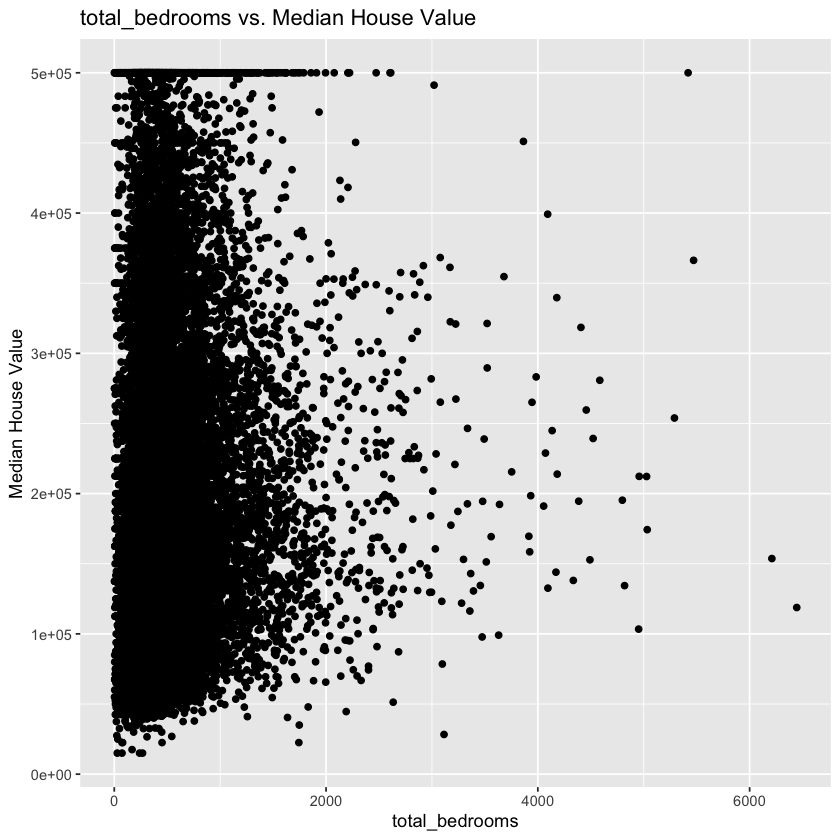

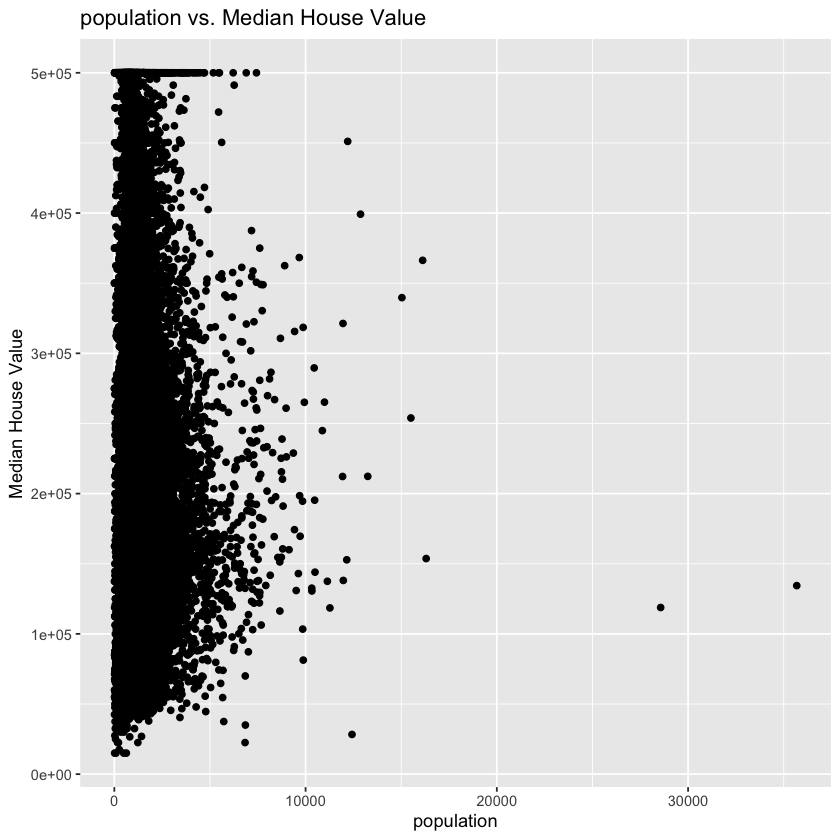

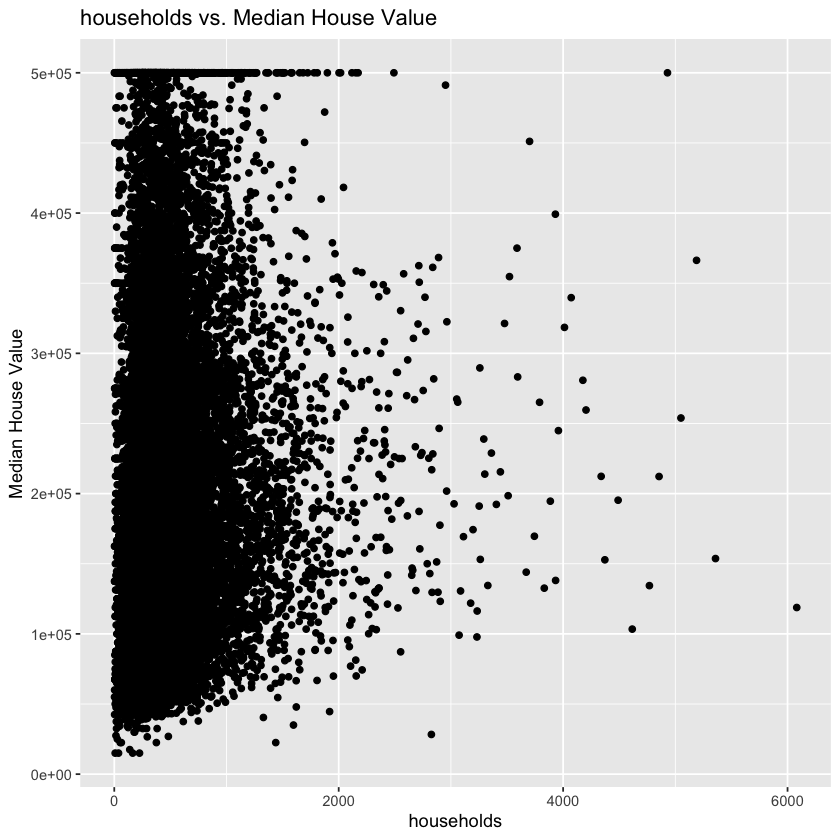

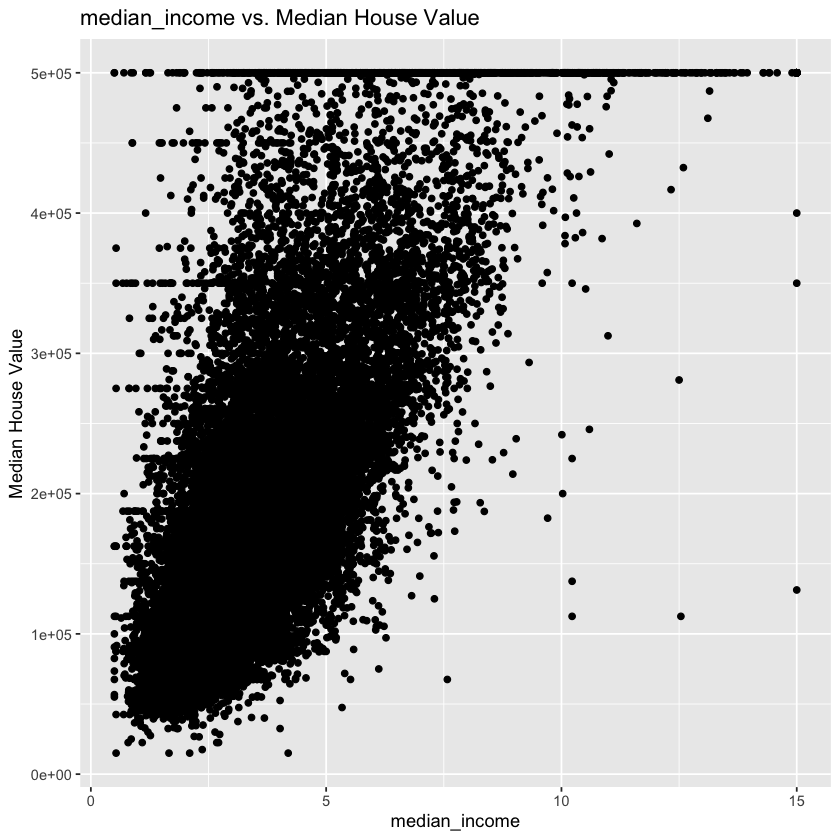

In [62]:
# List of explanatory variables
explanatory_vars <- c("longitude", "latitude", "housing_median_age", "total_rooms", 
                      "total_bedrooms", "population", "households", "median_income")

# Create scatter plots for each explanatory variable
for (var in explanatory_vars) {
  # Create ggplot object
  p <- ggplot(housing_data, aes_string(x = var, y = "median_house_value")) +
    geom_point() +
    labs(title = paste(var, "vs. Median House Value"),
         x = var, y = "Median House Value")
  
  # Print the plot
  print(p)
}

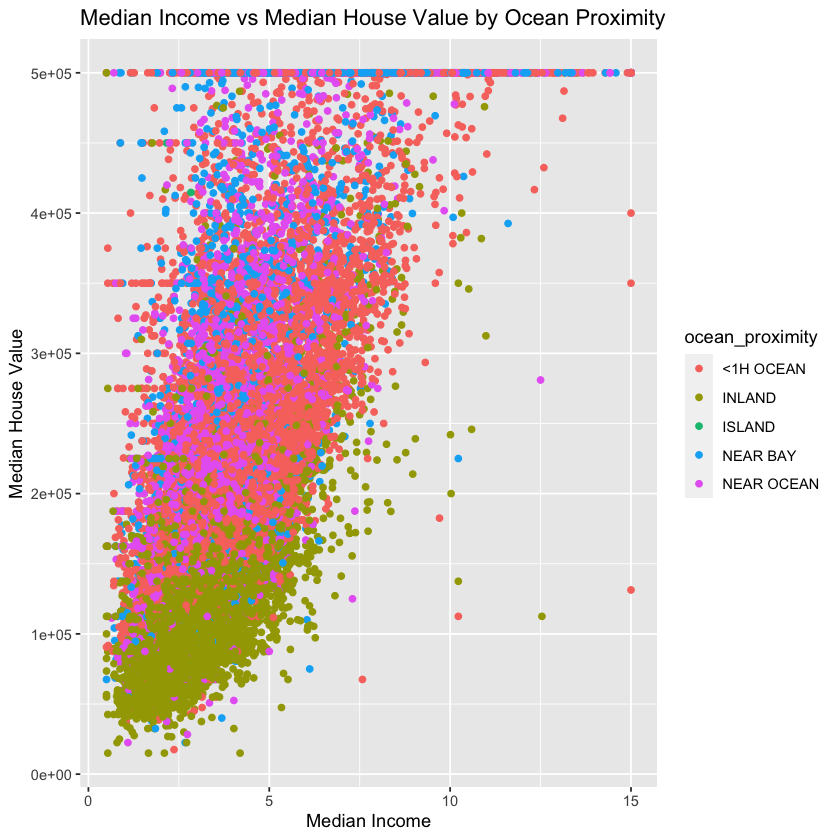

In [64]:
# Create ggplot for median income vs median house value, segmented by ocean proximity
ggplot(housing_data, aes(x = median_income, y = median_house_value, color = ocean_proximity)) +
  geom_point() +
  labs(title = "Median Income vs Median House Value by Ocean Proximity",
       x = "Median Income", y = "Median House Value")